In [1]:
import sys
sys.path.append('/Users/mariana/Documents/projects/Graphs/egnn')

In [2]:
from ae_datasets import d_selector, Dataloader
from ae_datasets.d_creator import max_n_nodes, DatasetCommunity, DatasetErdosRenyiNodes
import graph as gl

In [3]:
import networkx as nx

In [19]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [4]:
dataset_name = 'community_ours'

In [14]:
dataset = d_selector.retrieve_dataset(dataset_name, K=2, with_pos=True, n_nodes=10, directed=True)

Creating dataset with  2  communities


In [10]:
loader = Dataloader(dataset)

In [11]:
batch = next(iter(loader))

In [12]:
batch

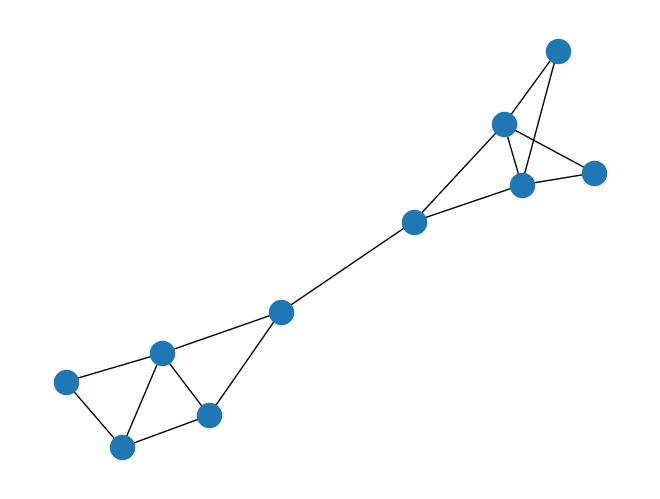

In [15]:
gl.plot_graph(dataset.graphs[0])

In [16]:
adjs = []
for graph in dataset.graphs:
    _, _, _, adj_gt = graph.get_dense_graph(store=True, loops=False)
    adjs.append(adj_gt)

In [20]:
A = adjs[0]

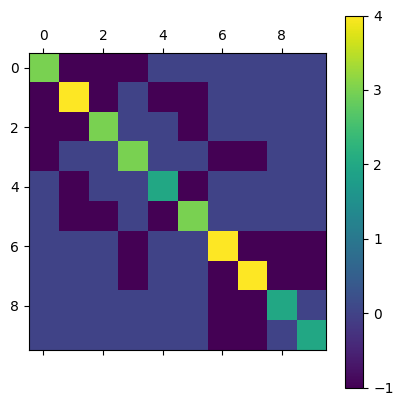

In [59]:
plt.matshow(l3)
plt.colorbar()

In [46]:
graph_nx = gl.graph2networkx(dataset.graphs[0])
l2 = nx.laplacian_matrix(graph_nx)

In [56]:
l3 = np.diag(a.sum(1)) - a

In [60]:
l3 == l2

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [47]:
l2 = l2.toarray()
l2

array([[ 3, -1, -1, -1,  0,  0,  0,  0,  0,  0],
       [-1,  4, -1,  0, -1, -1,  0,  0,  0,  0],
       [-1, -1,  3,  0,  0, -1,  0,  0,  0,  0],
       [-1,  0,  0,  3,  0,  0, -1, -1,  0,  0],
       [ 0, -1,  0,  0,  2, -1,  0,  0,  0,  0],
       [ 0, -1, -1,  0, -1,  3,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  4, -1, -1, -1],
       [ 0,  0,  0, -1,  0,  0, -1,  4, -1, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  2,  0],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  0,  2]])

In [51]:
a = nx.adj_matrix(graph_nx)
a = a.toarray()
a

/var/folders/gy/r509yr655150tg12h1t9h_tr0000gn/T/ipykernel_35939/3640487693.py:1: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  a = nx.adj_matrix(graph_nx)
/Users/mariana/.Envs/molgen/lib/python3.10/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])

In [50]:
L

array([[ 3.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  2., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  3., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1., -1.,  3.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  3., -1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  4., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1., -1., -1.,  4.]], dtype=float32)

In [43]:
L = np.diag(A.numpy().sum(1)) - A.numpy()

In [27]:
val, vec = np.linalg.eig(A)

In [28]:
val.shape

(10,)

In [29]:
vec.shape

(10, 10)

In [35]:
np.matmul(vec.T, vec).round(2)

array([[ 1.  , -0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,
         0.  ],
       [-0.  ,  1.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,
         0.  ],
       [-0.  ,  0.  ,  1.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,
        -0.  ],
       [-0.  , -0.  , -0.  ,  0.  ,  1.  ,  0.  ,  0.  , -0.  ,  0.  ,
        -0.  ],
       [ 0.  , -0.  , -0.  ,  0.  ,  0.  ,  1.  ,  0.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,  1.  , -0.  ,
         0.  ],
       [-0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  1.  ,
         0.14],
       [ 0.  ,  0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.14,
         1.  ]], dtype=float32)

In [38]:
vec @ np.diag(val) @ vec.T

array([[-3.6372057e-08,  1.2528631e-08,  1.8028441e-08,  1.0000000e+00,
         9.9999994e-01,  1.0000000e+00, -2.0706690e-08, -6.5182455e-09,
        -6.5182455e-09, -2.0706690e-08],
       [-3.1320724e-08,  2.7030978e-08,  9.9999988e-01,  1.0000001e+00,
         5.6066401e-08,  2.9024596e-09, -4.4483889e-10, -6.6864310e-09,
        -6.6864310e-09, -4.4483878e-10],
       [ 2.1644070e-08,  1.0000000e+00,  6.2993713e-08,  1.0000000e+00,
         1.0000000e+00,  1.5151837e-08, -1.3789294e-08,  2.7734549e-08,
         2.7734549e-08, -1.3789294e-08],
       [ 1.0000000e+00,  1.0000000e+00,  9.9999994e-01,  6.4838495e-08,
         1.0000000e+00,  4.3811063e-08,  3.2776239e-08,  7.3628925e-10,
         7.3628925e-10,  3.2776239e-08],
       [ 9.9999994e-01,  8.2863039e-08,  1.0000000e+00,  1.0000000e+00,
         8.9047973e-08, -2.0755744e-09, -1.3202207e-08, -2.4224558e-08,
        -2.4224558e-08, -1.3202207e-08],
       [ 9.9999994e-01, -5.0353215e-09,  5.2358127e-09,  3.2578431e-08,
   

3.1446671